## Smart Factory Energy Consumption Prediction

**Objective**: Predict equipment energy consumption using sensor and environmental data from a smart factory.  
**Approach**: Data analysis → feature engineering → model selection → evaluation → insight generation.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Load data
df = pd.read_csv("/content/data.csv")

Data Preprocessing

In [8]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [9]:
# Extract time features
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek

In [10]:
# Drop the original timestamp
df.drop(columns='timestamp', inplace=True)

In [11]:
# Coerce lighting_energy to numeric and clean
df['lighting_energy'] = pd.to_numeric(df['lighting_energy'], errors='coerce')
df['lighting_energy'] = df['lighting_energy'].apply(lambda x: x if pd.isna(x) or x >= 0 else np.nan)

In [15]:
# Clean all non-numeric columns by coercing to numeric (set errors='coerce' to turn 'error' into NaN)
for col in df.columns:
    if col != 'timestamp':  # Skip timestamp
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing values after coercion
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

<ipython-input-15-f462ea0d1607>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-15-f462ea0d1607>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


Feature Selection

In [16]:
target = 'equipment_energy_consumption'
X = df.drop(columns=[target])
y = df[target]

In [17]:
# Drop random variables if low correlation
if 'random_variable1' in X.columns and abs(X['random_variable1'].corr(y)) < 0.05:
    X = X.drop(columns='random_variable1')
if 'random_variable2' in X.columns and abs(X['random_variable2'].corr(y)) < 0.05:
    X = X.drop(columns='random_variable2')

Train/Test Split + Scaling

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Training

In [19]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

Evaluation

In [20]:
y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

Model Performance:
RMSE: 174.55
MAE: 70.74
R² Score: 0.1018


In [21]:
# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 5 Important Features:")
print(importances.head())


Top 5 Important Features:
hour                    0.057003
zone5_humidity          0.051555
atmospheric_pressure    0.048543
zone6_humidity          0.046446
zone8_temperature       0.044215
dtype: float64


Visualization

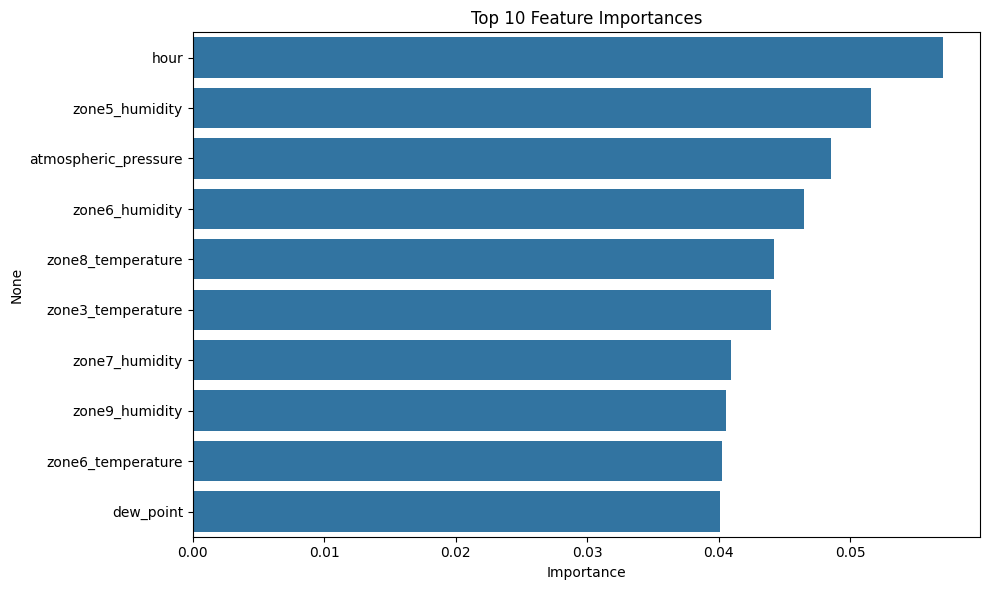

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x=importances.head(10), y=importances.head(10).index)
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()